In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
ifind_data = pd.read_excel(r'C:\Users\DINESH KUMAR\OneDrive\Desktop\sem6\mp\IFND.xlsx')

In [3]:
ifind_data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,True
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,True
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,True


In [4]:
ifind_data['Label'].value_counts()

True    37800
Fake    18914
Name: Label, dtype: int64

In [5]:
ifind_data.rename(columns={'Statement': 'text', 'Label': 'target','Date':'date'}, inplace=True)

In [6]:
ifind_data['target'] = ifind_data['target'].astype(str)
ifind_data['target'].replace(['True','Fake'],[1,0], inplace=True)

In [7]:
ifind_data['target'].value_counts()

1    37800
0    18914
Name: target, dtype: int64

In [8]:
ifind_data.head()

,id,text,Image,Web,Category,date,target
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,1
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,1
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,1


1    37800
0    18914
Name: target, dtype: int64


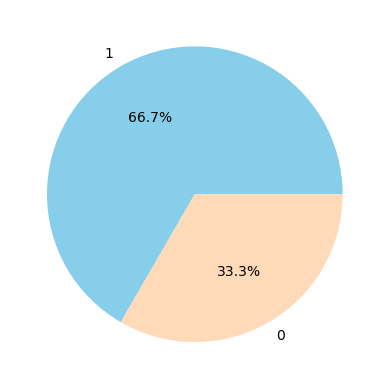

In [9]:
print(ifind_data["target"].value_counts())
g1 = plt.pie(ifind_data["target"].value_counts().values,explode=[0,0],labels=ifind_data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

GOVERNMENT    10923
VIOLENCE      10578
COVID-19       8710
POLITICS       8670
ELECTION       8396
TERROR         4384
MISLEADING     4059
TRAD            976
MISLEADIND       18
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

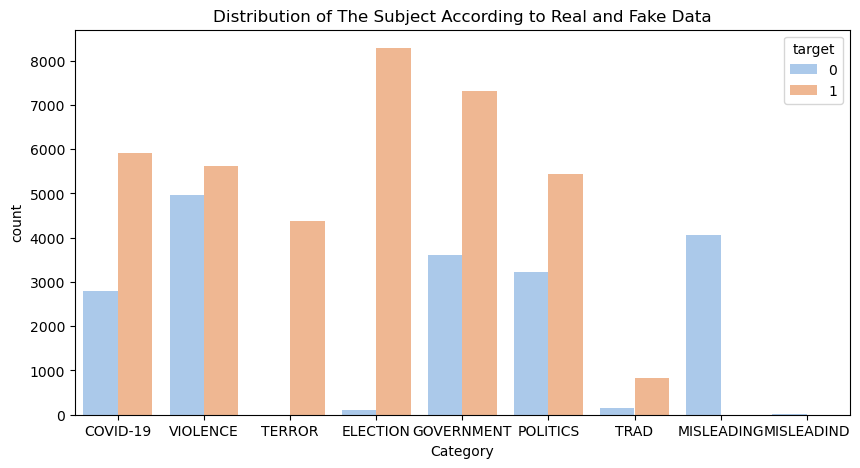

In [10]:
print(ifind_data.Category.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="Category",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

TRIBUNEINDIA        11832
AUGMENT             11321
THEPRINT             8582
THESTATESMAN         7202
THESTATEMAN          4048
INDIANEXPRESS        3983
NEWSMOBILE           2422
INDIATODAY           1698
BOOMLIVE              806
CNN                   778
NEWSMETER             572
ONEINDIA              549
BSMEDIA               449
TEEKHIMIRCHI          387
FACTCRESCENDO         272
AFP                   267
TIMESNOW              238
THELOGICALINDIAN      221
DIGITEYE              175
FACTLY                174
THELOGICALINDIA       173
FACTCHECKER           163
DAPAAN                136
DNAINDIA              121
ALT                    59
WAHSARKAR              42
ENGLISHTRIBUNE         21
INDUSTANTIMES          15
NDTV                    8
Name: Web, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

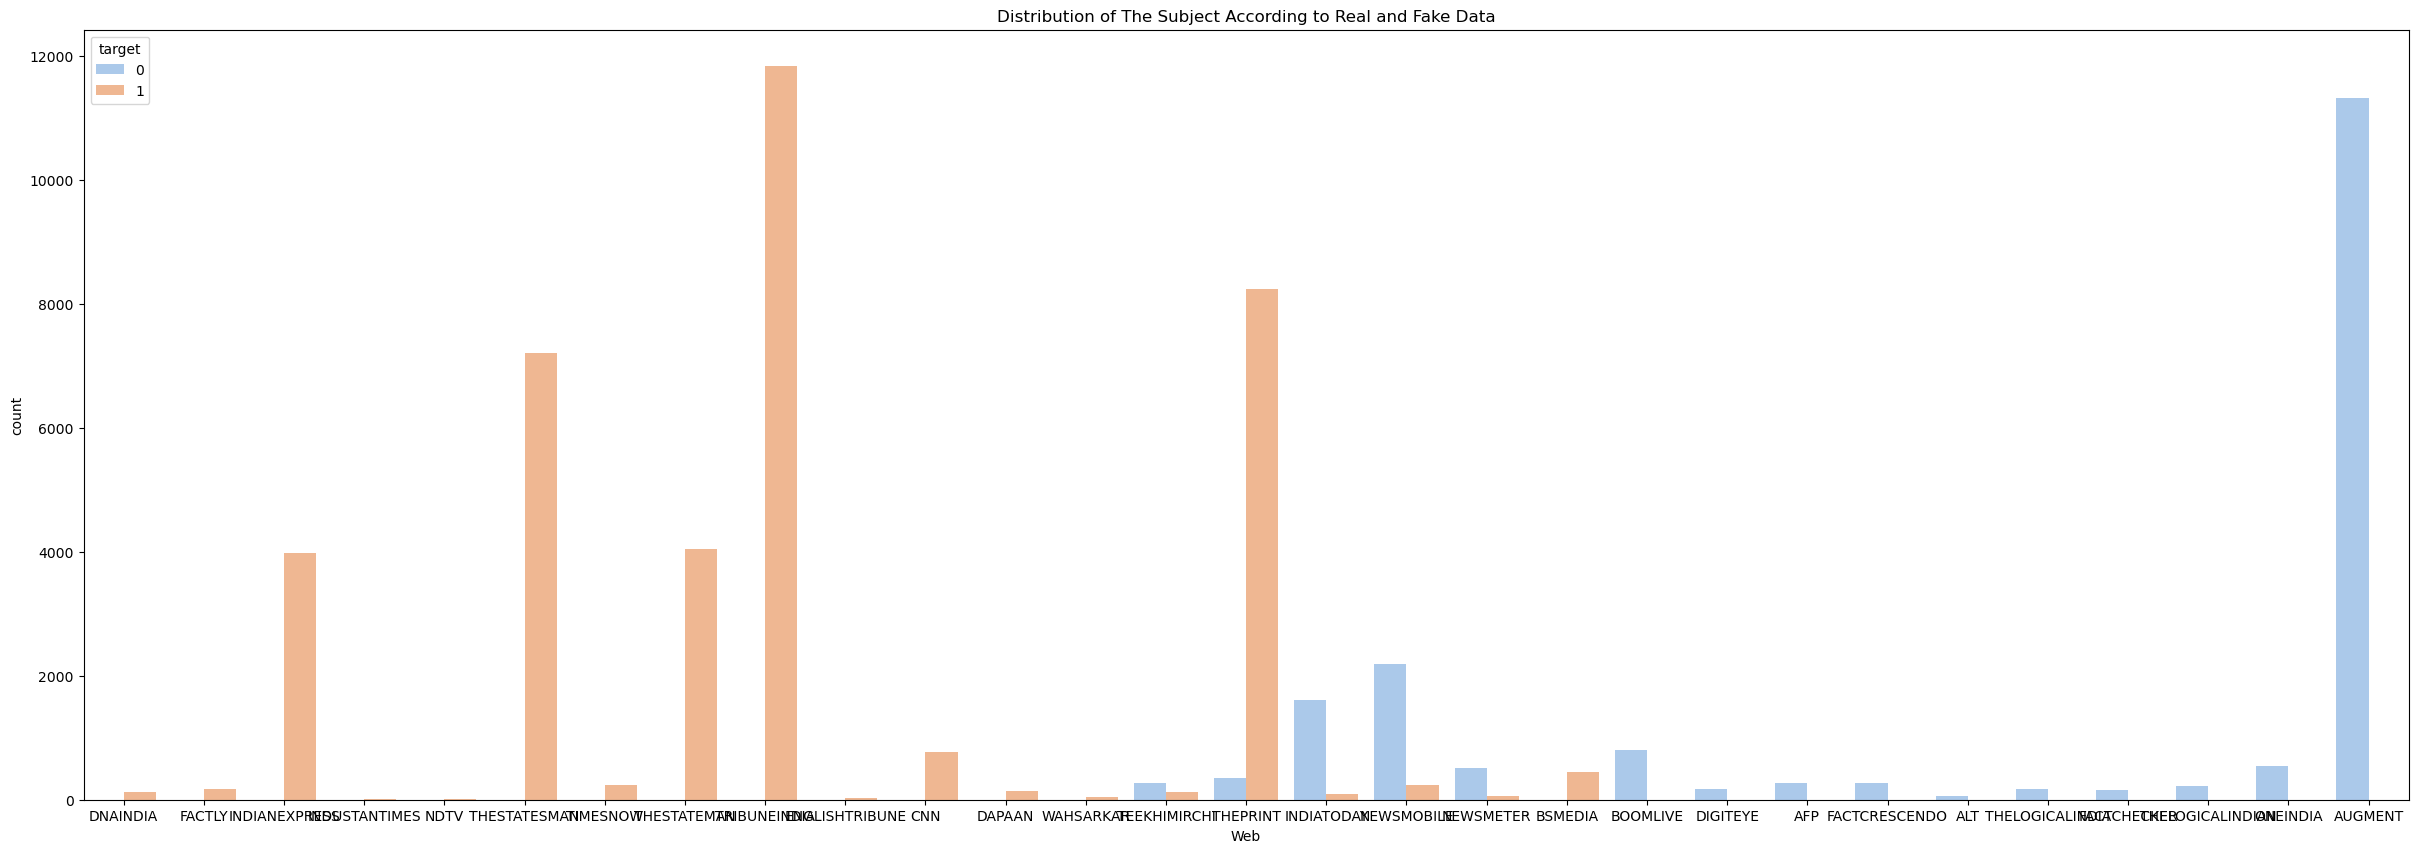

In [11]:
print(ifind_data.Web.value_counts())
plt.figure(figsize=(30, 10))

ax = sns.countplot(x="Web",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [12]:
ifind_data.groupby(['Web','target'])['id'].count()

Web               target
AFP               0           267
ALT               0            59
AUGMENT           0         11321
BOOMLIVE          0           806
BSMEDIA           1           449
CNN               1           778
DAPAAN            1           136
DIGITEYE          0           175
DNAINDIA          1           121
ENGLISHTRIBUNE    1            21
FACTCHECKER       0           163
FACTCRESCENDO     0           272
FACTLY            1           174
INDIANEXPRESS     1          3983
INDIATODAY        0          1606
                  1            92
INDUSTANTIMES     1            15
NDTV              1             8
NEWSMETER         0           506
                  1            66
NEWSMOBILE        0          2190
                  1           232
ONEINDIA          0           549
TEEKHIMIRCHI      0           262
                  1           125
THELOGICALINDIA   0           173
THELOGICALINDIAN  0           221
THEPRINT          0           344
                  1    

In [13]:
data = ifind_data[['text','target']].copy()

In [14]:
data.head()

,text,target
0,"WHO praises India's Aarogya Setu app, says it ...",1
1,"In Delhi, Deputy US Secretary of State Stephen...",1
2,LAC tensions: China's strategy behind delibera...,1
3,India has signed 250 documents on Space cooper...,1
4,Tamil Nadu chief minister's mother passes away...,1


In [15]:
first_text = data.text[10]
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [16]:
#Removal of html content
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [17]:
#removal of punctuation marks and special characters
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'amid stubble burning  delhi s air quality deteriorates to  very poor '

In [18]:
# nltk.download('punkt')
# nltk.download("stopwords") 
# nltk.download('wordnet')
from nltk.corpus import stopwords 

In [19]:
#tokenization and stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]
first_text

['amid',
 'stubble',
 'burning',
 'delhi',
 'air',
 'quality',
 'deteriorates',
 'poor']

In [20]:
#lemmatization
first_text = "Amid stubble burning, Delhi's air quality deteriorates to 'very poor "
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text.split()] 
first_text = " ".join(first_text)
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor"

In [21]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [22]:
#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    #lemma = nltk.WordNetLemmatizer()
    
    final_text = [word for word in text if word not in stopwords.words('english')]
    return " ".join(final_text)

In [23]:
def remove_stopwords(text):
    final_text = []
    final_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(final_text)

In [24]:
#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [25]:
data['text']=data['text'].apply(remove_html)
data['text']=data['text'].apply(remove_punctuations)
data['text']=data['text'].apply(remove_characters)
data['text']=data['text'].apply(remove_stopwords)

In [26]:
data.head()

,text,target
0,praises India Aarogya Setu app says helped ide...,1
1,Delhi Deputy US Secretary State Stephen Biegun...,1
2,LAC tensions China strategy behind deliberatel...,1
3,India signed documents Space cooperation count...,1
4,Tamil Nadu chief minister mother passes away,1


In [27]:
data.tail()

,text,target
56709,Fact Check Bruce Lee playing ping pong Nunchaku,0
56710,Fact Check Japan construct bridge hours,0
56711,Fact Check Viral video Mexico earthquake years...,0
56712,Fact Check Ballet performance Chinese couple g...,0
56713,Fact Check little boy crossing Jordan alone lo...,0


In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


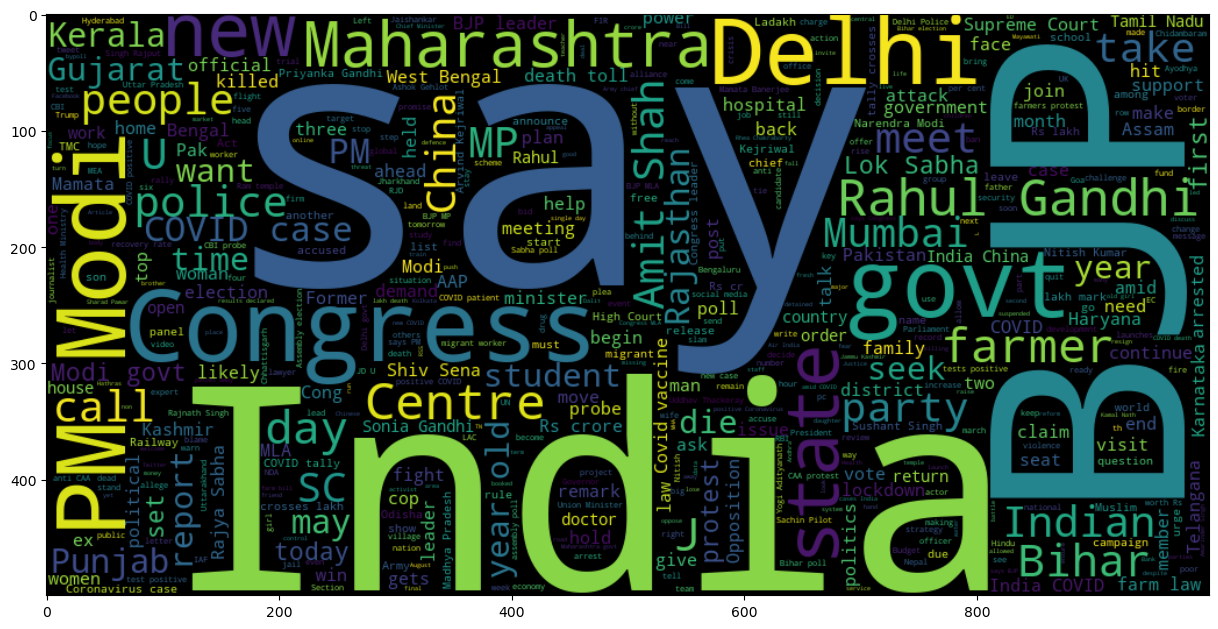

In [29]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

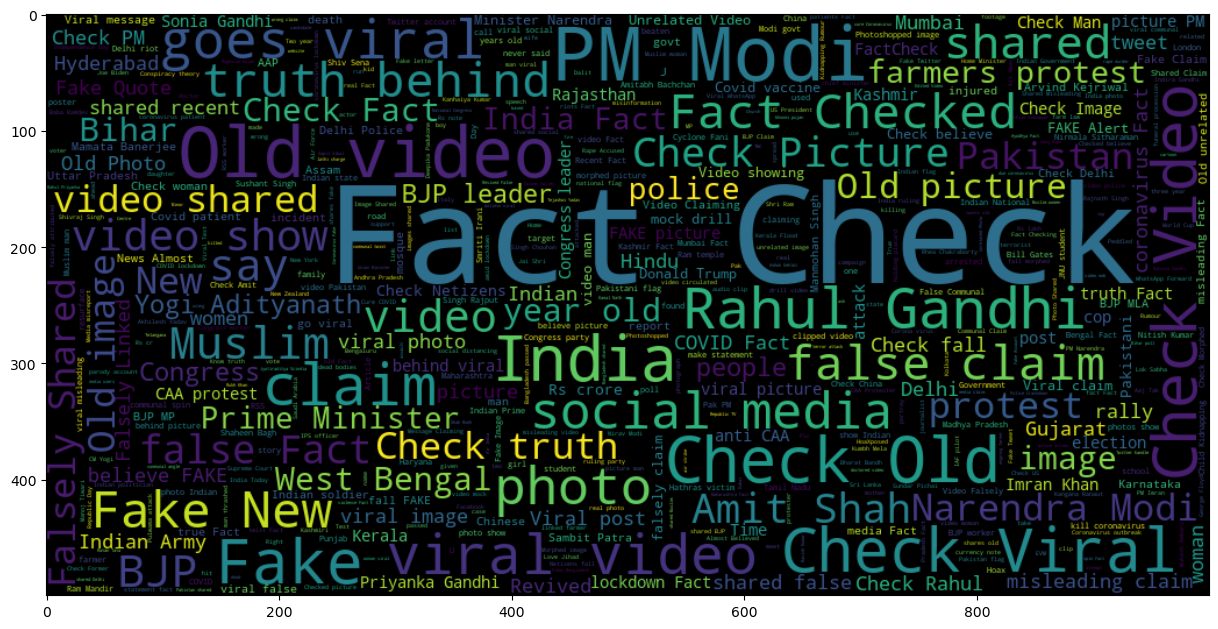

In [30]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

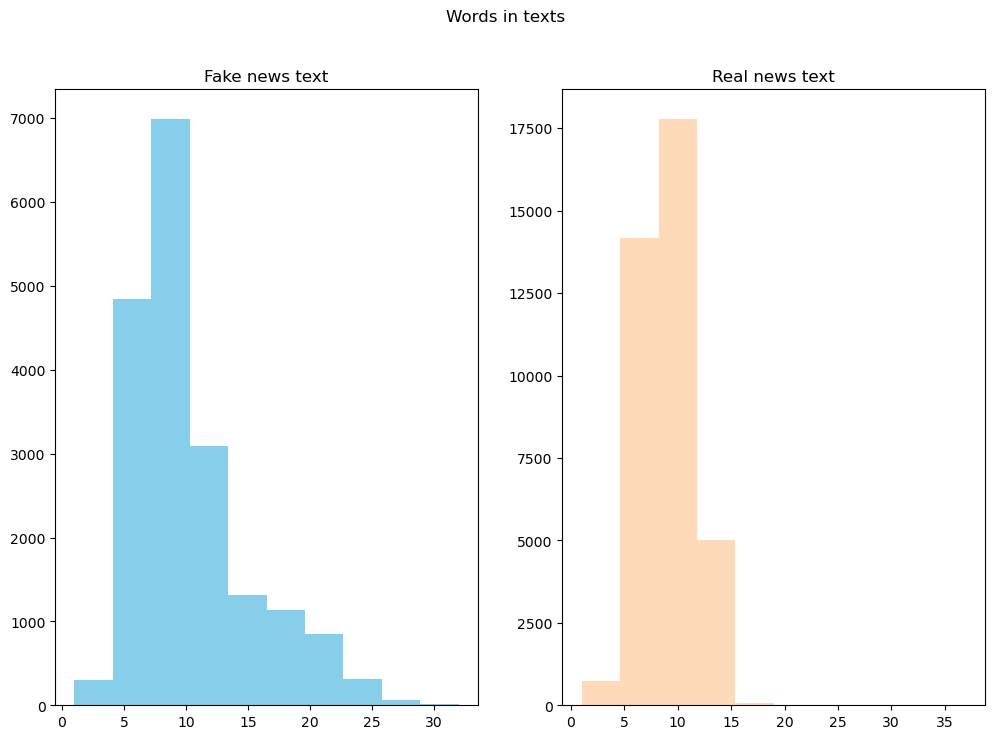

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [32]:
texts = ' '.join(data['text'])

In [33]:
string = texts.split(" ")

In [34]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

       word  count
0   (Fact,)   9958
1  (Check,)   9045
2  (India,)   5122
3    (BJP,)   4680
4   (Modi,)   4518


<Axes: xlabel='count', ylabel='word'>

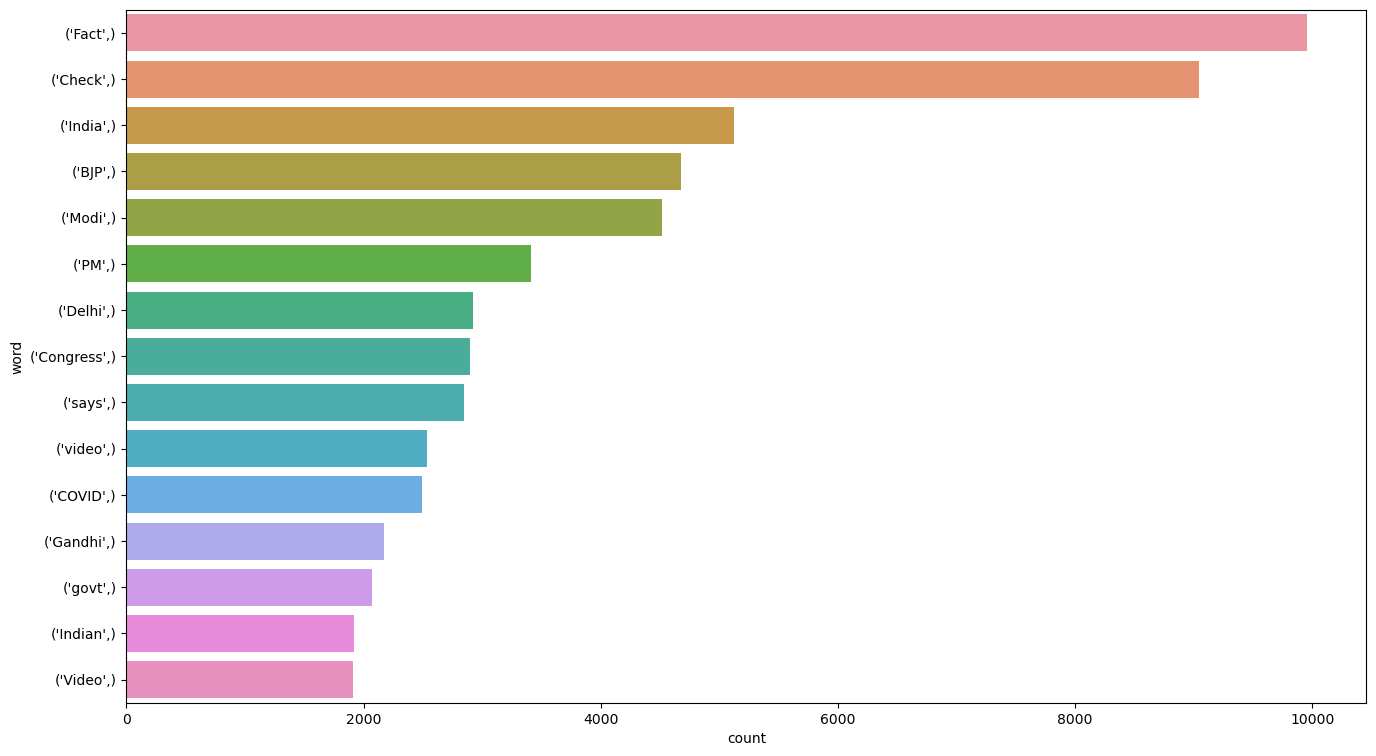

In [35]:
draw_n_gram(string,1)

              word  count
0    (Fact, Check)   9011
1       (PM, Modi)   2328
2  (Rahul, Gandhi)   1228
3     (Amit, Shah)    739
4           (J, K)    711


<Axes: xlabel='count', ylabel='word'>

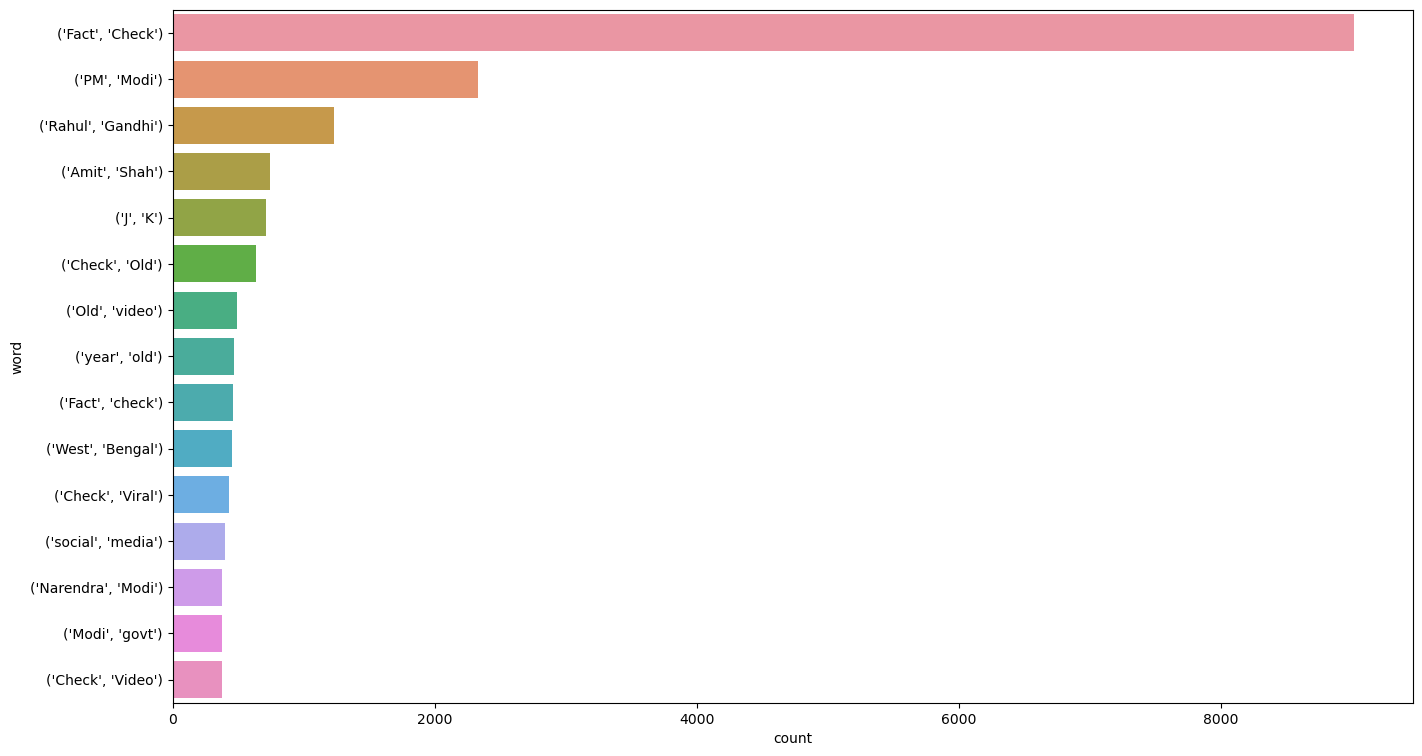

In [36]:
draw_n_gram(string,2)

                       word  count
0        (Fact, Check, Old)    638
1      (Fact, Check, Viral)    429
2      (Fact, Check, Video)    373
3  (Sushant, Singh, Rajput)    189
4      (Fact, Check, video)    176


<Axes: xlabel='count', ylabel='word'>

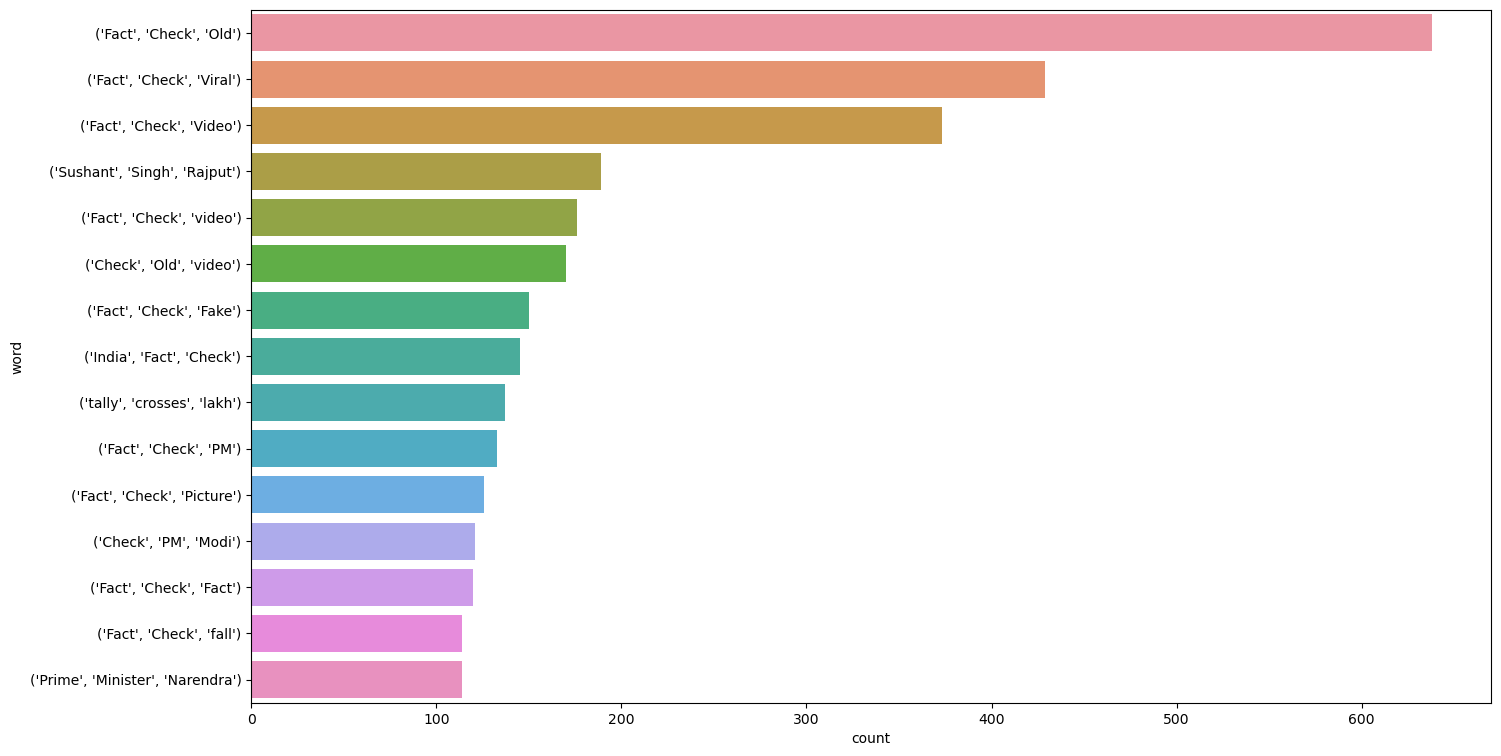

In [37]:
draw_n_gram(string,3)

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
X = data['text']
y = data['target']
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()





In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [41]:
print('\n the total number of training data :',y_train.shape)


 the total number of training data : (39699,)


In [42]:
print('\n the total number of testing data :',y_test.shape)


 the total number of testing data : (17015,)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [44]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)
# Classification metrics
classification_report = classification_report(y_test, y_pred)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9342344989714957


In [45]:
# Training the classifier & predicting on test data
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
# Classification metrics

print('\n Accuracy: ', accuracy_score(y_test, y_pred))



 Accuracy:  0.9286511901263591


In [46]:
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9298266235674405


In [47]:
!pip install textblob 

In [48]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
from datetime import datetime

In [49]:
def timesofindia():
    url = "https://timesofindia.indiatimes.com/home/headlines"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")
    times_of_india_news = []
    counter = 0
    for divtag in soup.find_all('div', {'class': 'headlines-list'}):
        for ultag in divtag.find_all('ul', {'class': 'clearfix'}):
            if (counter <= 10):
                for litag in ultag.find_all('li'):
                    counter = counter + 1
                    print(str(counter),datetime.today().strftime('%Y-%m-%d') + "." + litag.text + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])
                    times_of_india_news.append(['Times of India',datetime.today().strftime('%Y-%m-%d'),litag.text])
    return times_of_india_news

In [50]:
times_of_india_news = timesofindia()

1 2023-05-29.New Parliament a symbol of confident, 21st century India28 May 2023, 2114 hrs IST - https://timesofindia.indiatimes.com/india/new-parliament-a-symbol-of-confident-21st-century-india/articleshow/100573185.cms
2 2023-05-29.70yrs on, Norgay & Hillary sons unite to celebrate Himalayan feat - https://timesofindia.indiatimes.com/india/70-years-on-norgay-hillary-sons-unite-to-celebrate-himalayan-feat/articleshow/100575497.cms
3 2023-05-29.95,000-plus UPI frauds: 9 things that make users lose money on apps - https://timesofindia.indiatimes.comhttps://www.gadgetsnow.com/slideshows/95000-plus-upi-frauds-9-things-that-make-users-lose-money-on-googlepay-paytm-phonepe-and-other-financial-apps/photolist/100579126.cms
4 2023-05-29.IPL final, weather updates: Better forecast for Monday - https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/weather-updates-gt-vs-csk-better-forecast-for-ipl-final-on-reserve-day-may-29/articleshow/100579499.cms
5 2023-05-29.IT company Airmeet l

In [51]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install --upgrade setuptools

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install feedparser

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install "beautifulsoup4==4.9.1"

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install "dateparser==0.7.6"

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install "requests==2.24.0"

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install "feedparser==6.0.8"

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install --no-deps pygooglenews

Note: you may need to restart the kernel to use updated packages.


In [59]:
from pygooglenews import GoogleNews
import json
import time



def fetching_google_news():
    gn = GoogleNews()
    top = gn.top_news()

    entries = top["entries"]
    count = 0
    google_news = []
    for entry in entries:
        count = count + 1
        print( str(count) + ". " + entry["title"] + entry["published"])
        google_news.append(['Google News',entry["published"],entry["title"] ])
        time.sleep(0.25)
    return google_news

In [60]:
google_news = fetching_google_news()

1. Debt ceiling deal: What's in, what's out of the bill to avert US default - The Associated PressMon, 29 May 2023 02:27:28 GMT
2. Erdogan wins Turkish election, extending rule to third decade - CNNMon, 29 May 2023 02:15:00 GMT
3. Trump criticizes Texas Gov. Abbott for silence on impeachment of AG Ken Paxton - The HillSun, 28 May 2023 22:13:00 GMT
4. President Biden and Kevin McCarthy must sell debt ceiling deal to far-right Republicans, liberal Democrats - The Washington PostSun, 28 May 2023 21:57:00 GMT
5. 3 dead, 5 injured as biker gang shootout erupts in Red River, New Mexico - ABC NewsSun, 28 May 2023 18:22:30 GMT
6. Escaped inmate from northwest Ohio prison found dead in Ohio River - WBNS 10TVSun, 28 May 2023 22:51:41 GMT
7. Arizona man arrested after police connect him to shooting spree that left 4 dead, 1 injured - Fox NewsMon, 29 May 2023 01:06:00 GMT
8. 'My fellow Republicans wanted me to lie,' Liz Cheney says in commencement speech - POLITICOSun, 28 May 2023 21:10:48 GMT
9. 

In [61]:
news_content = []

In [62]:
news_content+=times_of_india_news
news_content+= google_news
news_content_df = pd.DataFrame(news_content,columns = ['New_Site','Date' , 'Title'])

In [63]:
news_content_df.head()

,New_Site,Date,Title
0,Times of India,2023-05-29,"New Parliament a symbol of confident, 21st cen..."
1,Times of India,2023-05-29,"70yrs on, Norgay & Hillary sons unite to celeb..."
2,Times of India,2023-05-29,"95,000-plus UPI frauds: 9 things that make use..."
3,Times of India,2023-05-29,"IPL final, weather updates: Better forecast fo..."
4,Times of India,2023-05-29,IT company Airmeet lays off 30% of workforce; ...


In [64]:
textblob_sentiment=[]
for index , row in news_content_df.iterrows():
    title = row['Title']
    txt= TextBlob(title)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([a,b])

In [65]:
news_content_df['Text_blob_Polarity'] , news_content_df['Text_blob_Subjectivity'] = zip(*textblob_sentiment)

In [66]:
news_content_df['Title_clean']=news_content_df['Title'].apply(remove_html)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_punctuations)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_characters)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_stopwords)

In [67]:
X_real = td.transform(news_content_df['Title_clean']).toarray()

In [68]:
news_content_df['Prediction_LR'] = classifier_lr.predict(X_real)
news_content_df['Prediction_RF'] = classifier_rf.predict(X_real)
news_content_df['Prediction_NB'] = classifier_nb.predict(X_real)

In [69]:
news_content_df['Prediction_LR'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_RF'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_NB'].replace([1,0], ['True','Fake'],inplace=True)

In [70]:
news_content_df.head()

,New_Site,Date,Title,Text_blob_Polarity,Text_blob_Subjectivity,Title_clean,Prediction_LR,Prediction_RF,Prediction_NB
0,Times of India,2023-05-29,"New Parliament a symbol of confident, 21st cen...",0.212121,0.429293,New Parliament symbol confident st century Ind...,True,True,True
1,Times of India,2023-05-29,"70yrs on, Norgay & Hillary sons unite to celeb...",0.000000,0.000000,yrs Norgay Hillary sons unite celebrate Himala...,True,True,True
2,Times of India,2023-05-29,"95,000-plus UPI frauds: 9 things that make use...",0.000000,0.000000,plus UPI frauds things make users lose money apps,True,True,True
3,Times of India,2023-05-29,"IPL final, weather updates: Better forecast fo...",0.250000,0.750000,IPL final weather updates Better forecast Monday,True,True,True
4,Times of India,2023-05-29,IT company Airmeet lays off 30% of workforce; ...,0.000000,0.000000,company Airmeet lays workforce CEO mail employ...,True,True,True


In [71]:
news_content_df.to_excel('Result.xlsx')

In [79]:
def real_time_prediction(news):
  news_transformed = td.transform([news]).toarray()
  Prediction_LR = classifier_lr.predict(news_transformed)
  Prediction_RF = classifier_rf.predict(news_transformed)
  Prediction_NB = classifier_nb.predict(news_transformed)
  Prediction_LR = ['Real'  if i == 1 else 'Fake' for i in Prediction_LR ]
  print(f"Based on Logistic Regression model this News is ::{Prediction_LR[0]}")
  Prediction_RF = ['Real'  if i == 1 else 'Fake' for i in Prediction_RF ]
  print(f"Based on  Random Forest Model this News is ::{Prediction_RF[0]}")
  Prediction_NB = ['Real'  if i == 1 else 'Fake' for i in Prediction_NB ]
  print(f"Based on Naive Bayes model this News is :: {Prediction_NB[0]} ")

In [83]:
news = input("Please Enter the News which you want to prdict : ")
real_time_prediction(news)

Please Enter the News which you want to prdict : The government of Tamil Nadu announced that summer holidays has been extended for school studentsd 
Based on Logistic Regression model this News is ::Real
Based on  Random Forest Model this News is ::Real
Based on Naive Bayes model this News is :: Real 
